In [1]:
import pandas as pd

test_sample = pd.read_csv('under-sample.csv')

In [2]:
test_sample.head()

,Unnamed: 0,business_id,user_id,text,cool,stars,date,funny,review_id,useful,...,address,city,state,latitude,longitude,average_business_stars,recieved_reviews,categories,attributes,tip_review
0,0,ZeJjnl4o5sffMxPTt7h6ug,CNPZ2ZjDu-lNPKi6f5wEIA,I tried to give this company the benefit of th...,0,1.0,2015-09-09 15:02:48+00:00,0,Zs2sKoUKASUe_WsGpQuE8A,5,...,241 Boro Line Rd,kop,PA,40.102683,-75.355972,2.0,70,"Automotive, Auto Repair, Towing",{'BusinessAcceptsCreditCards': 'False'},NaN
1,1,Ccs-77XZCWf1aOozv6U-Ww,nJVAtTBB-25RiomzBB8bHw,We ended up here through serendipity... White ...,0,5.0,2017-11-18 19:59:59+00:00,0,Eju6FaSp93TC_g06mwwFzA,0,...,209 Vineyard Rd,Atco,NJ,39.738343,-74.886403,4.5,53,"Food, Arts & Entertainment, Wineries","{'GoodForKids': 'False', 'RestaurantsPriceRang...",NaN
2,2,FHdgpBT2Br7BL-V3gglIkA,zZOjl_mlBoqJN22dD5nbpQ,Bouncers were actively enforcing CDC/ social d...,0,5.0,2020-06-27 04:51:22+00:00,0,ulSlOe8dnv8mjLvLtly8hQ,0,...,286 White Horse Pike,Atco,NJ,39.772589,-74.900347,3.0,58,"American (Traditional), Nightlife, Bars, Sport...","{'Alcohol': ""u'full_bar'"", 'BusinessAcceptsCre...",NaN
3,3,FHdgpBT2Br7BL-V3gglIkA,DWO5d7GJWB2Mmuv67yY_fQ,Its a place that I comfortable but I hate when...,0,2.0,2016-01-08 22:35:17+00:00,0,dISAAuF9njJb6pT2J1ILuQ,0,...,286 White Horse Pike,Atco,NJ,39.772589,-74.900347,3.0,58,"American (Traditional), Nightlife, Bars, Sport...","{'Alcohol': ""u'full_bar'"", 'BusinessAcceptsCre...",NaN
4,4,FHdgpBT2Br7BL-V3gglIkA,fJrZ-1B0ngdgM_2qQY_6BA,Great food and great staff! There racks Mack b...,0,5.0,2019-04-12 20:31:51+00:00,0,MlSZu7iI4pbCl7MY0eFXgA,0,...,286 White Horse Pike,Atco,NJ,39.772589,-74.900347,3.0,58,"American (Traditional), Nightlife, Bars, Sport...","{'Alcohol': ""u'full_bar'"", 'BusinessAcceptsCre...",NaN


In [3]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327662 entries, 0 to 327661
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              327662 non-null  int64  
 1   business_id             327662 non-null  object 
 2   user_id                 327662 non-null  object 
 3   text                    327662 non-null  object 
 4   cool                    327662 non-null  int64  
 5   stars                   327662 non-null  float64
 6   date                    327662 non-null  object 
 7   funny                   327662 non-null  int64  
 8   review_id               327662 non-null  object 
 9   useful                  327662 non-null  int64  
 10  average_user_stars      327661 non-null  float64
 11  yelping_since           327661 non-null  object 
 12  submitted_reviews       327661 non-null  float64
 13  name                    327662 non-null  object 
 14  address             

In [4]:
test_sample[['latitude', 'longitude']]

,latitude,longitude
0,40.102683,-75.355972
1,39.738343,-74.886403
2,39.772589,-74.900347
3,39.772589,-74.900347
4,39.772589,-74.900347
...,...,...
327657,39.892485,-75.091006
327658,39.892485,-75.091006
327659,40.148549,-75.022480
327660,40.046024,-75.060111


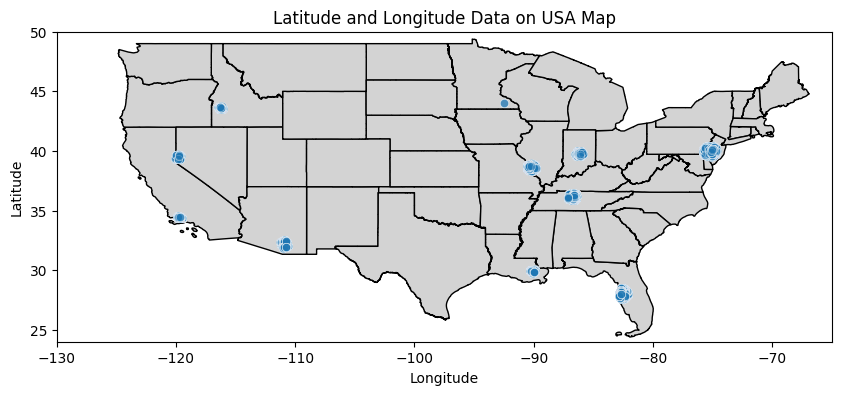

In [12]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

usa = gpd.read_file('tl_2023_us_state.shx')
geometry = [Point(lon, lat) for lon, lat in zip(test_sample['longitude'], test_sample['latitude'])]
gdf = gpd.GeoDataFrame(test_sample, geometry=geometry, crs='EPSG:4326')

ax = usa.plot(figsize=(10, 10), color='lightgray', edgecolor='black')
# gdf.plot(ax=ax, color='red', markersize=5)
sns.scatterplot(data=test_sample, x='longitude', y='latitude', alpha=.5)

ax.set_title('Latitude and Longitude Data on USA Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])  
plt.show()

In [6]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327662 entries, 0 to 327661
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              327662 non-null  int64  
 1   business_id             327662 non-null  object 
 2   user_id                 327662 non-null  object 
 3   text                    327662 non-null  object 
 4   cool                    327662 non-null  int64  
 5   stars                   327662 non-null  float64
 6   date                    327662 non-null  object 
 7   funny                   327662 non-null  int64  
 8   review_id               327662 non-null  object 
 9   useful                  327662 non-null  int64  
 10  average_user_stars      327661 non-null  float64
 11  yelping_since           327661 non-null  object 
 12  submitted_reviews       327661 non-null  float64
 13  name                    327662 non-null  object 
 14  address             